In [1]:
from datascience import *
path_data = '../data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Iteration
It is often the case in programming – especially when dealing with randomness – that we want to repeat a process multiple times. For example, recall the game of betting on one roll of a die with the following rules:

- If the die shows 1 or 2 spots, my net gain is -1 dollar.
- If the die shows 3 or 4 spots, my net gain is 0 dollars.
- If the die shows 5 or 6 spots, my net gain is 1 dollar.

The function `bet_on_one_roll` takes no argument. Each time it is called, it simulates one roll of a fair die and returns the net gain in dollars.

In [2]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

Playing this game once is easy:

In [3]:
bet_on_one_roll()

1

To get a sense of how variable the results are, we have to play the game over and over again. We could run the cell repeatedly, but that's tedious, and if we wanted to do it a thousand times or a million times, forget it.  

A more automated solution is to use a `for` statement to loop over the contents of a sequence. This is called *iteration*. A `for` statement begins with the word `for`, followed by a name we want to give each item in the sequence, followed by the word `in`, and ending with an expression that evaluates to a sequence. The indented body of the `for` statement is executed once *for each item in that sequence*.

In [4]:
for animal in make_array('cat', 'dog', 'rabbit'):
    print(animal)

cat
dog
rabbit


It is helpful to write code that exactly replicates a `for` statement, without using the `for` statement.  This is called *unrolling* the loop.  

A `for` statement simple replicates the code inside it, but before each iteration, it assigns a new value from the given sequence to the name we chose.  For example, here is an unrolled version of the loop above.

In [5]:
animal = make_array('cat', 'dog', 'rabbit').item(0)
print(animal)
animal = make_array('cat', 'dog', 'rabbit').item(1)
print(animal)
animal = make_array('cat', 'dog', 'rabbit').item(2)
print(animal)

cat
dog
rabbit


Notice that the name `animal` is arbitrary, just like any name we assign with `=`.

Here we use a `for` statement in a more realistic way: we print the results of betting five times on the die as described earlier. This is called *simulating* the results of five bets. We use the word *simulating* to remind ourselves that we are not physically rolling dice and exchanging money but using Python to mimic the process.

To repeat a process `n` times, it is common to use the sequence `np.arange(n)` in the `for` statement. It is also common to use a very short name for each item. In our code we will use the name `i` to remind ourselves that it refers to an item.

In [6]:
for i in np.arange(5):
    print(bet_on_one_roll())

0
1
1
0
-1


In this case, we simply perform exactly the same (random) action several times, so the code in the body of our `for` statement does not actually refer to `i`.

## Augmenting Arrays

While the `for` statement above does simulate the results of five bets, the results are simply printed and are not in a form that we can use for computation. Any array of results would be more useful. Thus a typical use of a `for` statement is to create an array of results, by augmenting the array each time.

The `append` method in `NumPy` helps us do this. The call `np.append(array_name, value)` evaluates to a new array that is `array_name` augmented by `value`. When you use `append`, keep in mind that all the entries of an array must have the same type.

In [7]:
pets = make_array('Cat', 'Dog')
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

This keeps the array `pets` unchanged:

In [8]:
pets

array(['Cat', 'Dog'], dtype='<U3')

But often while using `for` loops it will be convenient to mutate an array – that is, change it – when augmenting it. This is done by assigning the augmented array to the same name as the original.

In [9]:
pets = np.append(pets, 'Another Pet')
pets

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

## Example: Betting on 5 Rolls
We can now simulate five bets on the die and collect the results in an array that we will call the *collection array*. We will start out by creating an empty array for this, and then append the outcome of each bet. Notice that the body of the `for` loop contains two statements. Both statements are executed for each item in the given sequence.

In [10]:
outcomes = make_array()

for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
outcomes

array([ 0.,  0., -1.,  0.,  0.])

Let us rewrite the cell with the `for` statement unrolled:

In [11]:
outcomes = make_array()

i = np.arange(5).item(0)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(1)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(2)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(3)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(4)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

outcomes

array([ 0.,  1., -1.,  0.,  1.])

The contents of the array are likely to be different from the array that we got by running the previous cell, but that is because of randomness in rolling the die. The process for creating the array is exactly the same.

By capturing the results in an array we have given ourselves the ability to use array methods to do computations. For example, we can use `np.count_nonzero` to count the number of times money changed hands.

In [12]:
np.count_nonzero(outcomes)

3

## Example: Betting on 300 Rolls
Iteration is a powerful technique. For example, we can see the variation in the results of 300 bets by running exactly the same code for 300 bets instead of five.

In [13]:
outcomes = make_array()

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)

The array `outcomes` contains the results of all 300 bets.

In [14]:
len(outcomes)

300

To see how often the three different possible results appeared, we can use the array `outcomes` and `Table` methods.

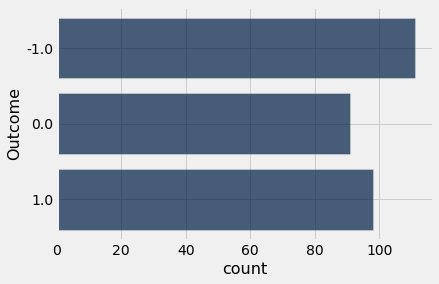

In [15]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)

Not surprisingly, each of the three outcomes -1, 0, and 1 appeared about about 100 of the 300 times, give or take. We will examine the "give or take" amounts more closely in later chapters.